#  Runtime analysis of standard deviation

In [1]:
%load_ext autoreload
%autoreload 2
import preprocessing.utils_script as utils
from preprocessing.utils import convert_leaf_to_json, get_predicates_from_path, ground_truth_distibution, load_BGPS_from_json

from graph_construction.bgp import BGP
from graph_construction.triple_pattern import TriplePattern
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
utils.print_latency_stats('/work/data/data_files/processed_gt.json')

Statistics for /work/data/data_files/processed_gt.json
	Median: 37110725.0
	Std: 35512610083.66495
	Average: 6245465617.218956
	25%-quantile: 9363332.0
	75%-quantile: 319409687.0


In [4]:
utils.print_latency_stats('/work/data/data_files/processed_gt.json', runtime_field='bloom_runtime')

Statistics for /work/data/data_files/processed_gt.json
	Median: 40440400.0
	Std: 40675385955.14158
	Average: 7220427621.695388
	25%-quantile: 10285456.0
	75%-quantile: 351607322.0


Here analyse the runtime information

In [5]:
#bgps=load_BGPS_from_json('/work/data/data_files/processed_gt.json')
bgps = json.load(open('/work/data/data_files/processed_gt.json', 'r'))
jena_rt = utils.get_runtimes(bgps)
blm_rt = utils.get_runtimes(bgps, runtime_field = 'bloom_runtime')
mean_jena = np.mean(jena_rt)
#utils.print_latency_stats()

In [6]:
utils.relative_error(jena_rt, blm_rt)

Jena Mean:  6245465617.218956


0.16066449600711086

In [7]:
re_s = utils.relative_error(jena_rt,blm_rt, aggregate=False)

Jena Mean:  6245465617.218956


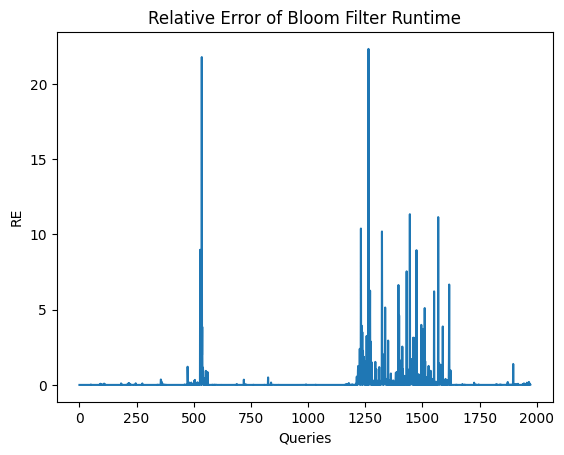

In [8]:
plt.title('Relative Error of Bloom Filter Runtime')
plt.ylabel('RE')
plt.xlabel('Queries')
plt.plot(re_s)

This is just test code

In [13]:
print(np.sum(re_s)/len(re_s))
n_re_s = []
for i, k in enumerate(bgps.keys()):
    if i < 10:
        print(bgps[k]['jena_runtime'] , bgps[k]['bloom_runtime'],(abs(bgps[k]['jena_runtime'] - bgps[k]['bloom_runtime']) )/mean_jena)
    #n_re_s.append(utils.single_re(bgps[k]['jena_runtime'],bgps[k]['bloom_runtime'],mean_jena))
    n_re_s.append(utils.single_re(bgps[k]['jena_runtime'],bgps[k]['bloom_runtime'],mean_jena))
print(np.sum(n_re_s)/len(n_re_s))

0.16066449600711086
4362821 5069414 0.00011313696100606168
3127812 2824385 4.858356743866169e-05
3527005 3748416 3.5451480092943356e-05
3637075 4597504 0.00015378020773216096
2818902 4415432 0.00025563026007193346
3323395 3133058 3.0476030397995398e-05
3542820 3669340 2.025789712958793e-05
3728627 3754535 4.148289589261493e-06
3143469 3516594 5.974334387035644e-05
3763595 3395795 5.8890725294518184e-05
0.16066449600711086


print re information

std:  103.36903540010157
mean:  16.06644960071108
min:  3.8267763309923455e-06
max:  2232.723164523529
25%-q:  0.01049803233552913
55%-q:  0.0647060643302285
75%-q:  0.6977413161935633


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb9abd17e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb9abd1d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb9abd1540>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb9abd2260>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb9abd2500>],
 'means': []}

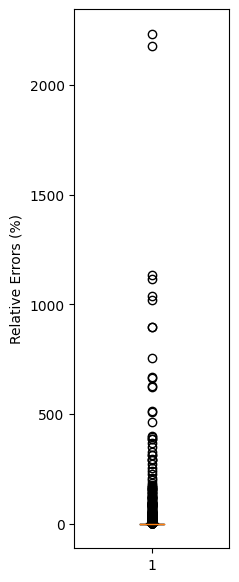

In [36]:
p_re_s = [x*100 for x in re_s]
print('std: ', np.std(p_re_s))
print('mean: ', np.mean(p_re_s))
print('min: ', np.min(p_re_s))
print('max: ', np.max(p_re_s))
print('25%-q: ', np.quantile(p_re_s, q=0.25))
print('55%-q: ', np.quantile(p_re_s, q=0.5))
print('75%-q: ', np.quantile(p_re_s, q=0.75))

plt.figure(figsize =(2, 7))
plt.ylabel('Relative Errors (%)')
plt.boxplot(p_re_s)

Create bar data of reletive error for different threshold

{'true': [1973, 441, 284, 226, 171, 147, 122, 97, 89, 84, 79, 69], 'false': [0, 1532, 1689, 1747, 1802, 1826, 1851, 1876, 1884, 1889, 1894, 1904]}


<Figure size 1000x700 with 0 Axes>

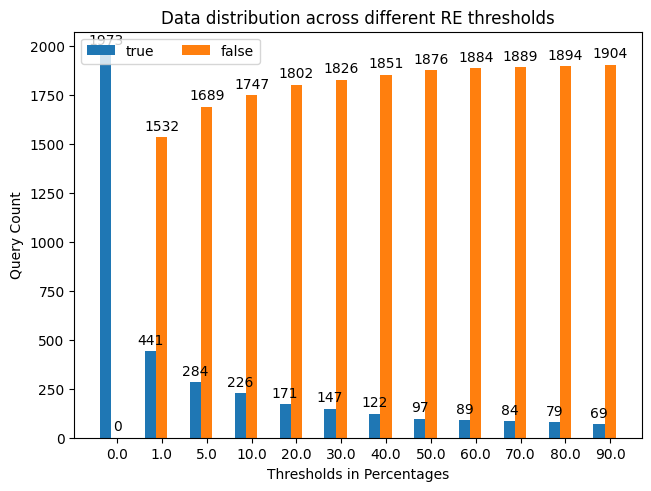

In [44]:
plt.figure(figsize =(10, 7))
thresholds = [round(x*0.1,2) for x in range(10)]
thresholds.extend([0.01,0.05])
thresholds= sorted(thresholds)
data = {'true':[], 'false':[]}
for t in thresholds:
    true, false = utils.re_gt_analysis(bgps, t, mean_jena)
    data['true'].append(true)
    data['false'].append(false)
print(data)
thresholds = [x*100 for x in thresholds]
x = np.arange(len(thresholds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Query Count')
ax.set_xlabel('Thresholds in Percentages')
ax.set_title('Data distribution across different RE thresholds')
ax.set_xticks(x + width, thresholds)
ax.legend(loc='upper left', ncols=2)
#ax.set_ylim(0, 250)

plt.show()

# Extended Analysis

In [1]:
bgps = json.load(open('/work/data/data_files/processed_gt.json', 'r'))
jena_rt = utils.get_runtimes(bgps)
mean_jena = np.mean(jena_rt)
print(len(bgps))

NameError: name 'json' is not defined